<a href="https://colab.research.google.com/github/lakshaydua08/PA_HW3/blob/final_raw/PA_Lakshay_Dua_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
from google.colab import files

# Load the dataset
uploaded = files.upload()

Saving Breast_Cancer_dataset.csv to Breast_Cancer_dataset.csv


# **Step 1: Preprocessing**

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('Breast_Cancer_dataset.csv')

# Display basic information and first few rows of the dataset
print(data.info())  # To see the types of each column and null counts
data.head() # Display the first few rows of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3823 non-null   float64
 1   Race                    3622 non-null   object 
 2   Marital Status          3703 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              3622 non-null   float64
 10  Estrogen Status         3823 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  3421 non-null   float64
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,50.0,White,NaN,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,58.0,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,58.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,NaN,Positive,Positive,2.0,1,84,Alive
4,47.0,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,NaN,Positive,3.0,1,50,Alive


Outlier counts for each numeric column:
Age                         0
Tumor Size                203
Regional Node Examined     60
Reginol Node Positive     344
Survival Months            18
dtype: int64


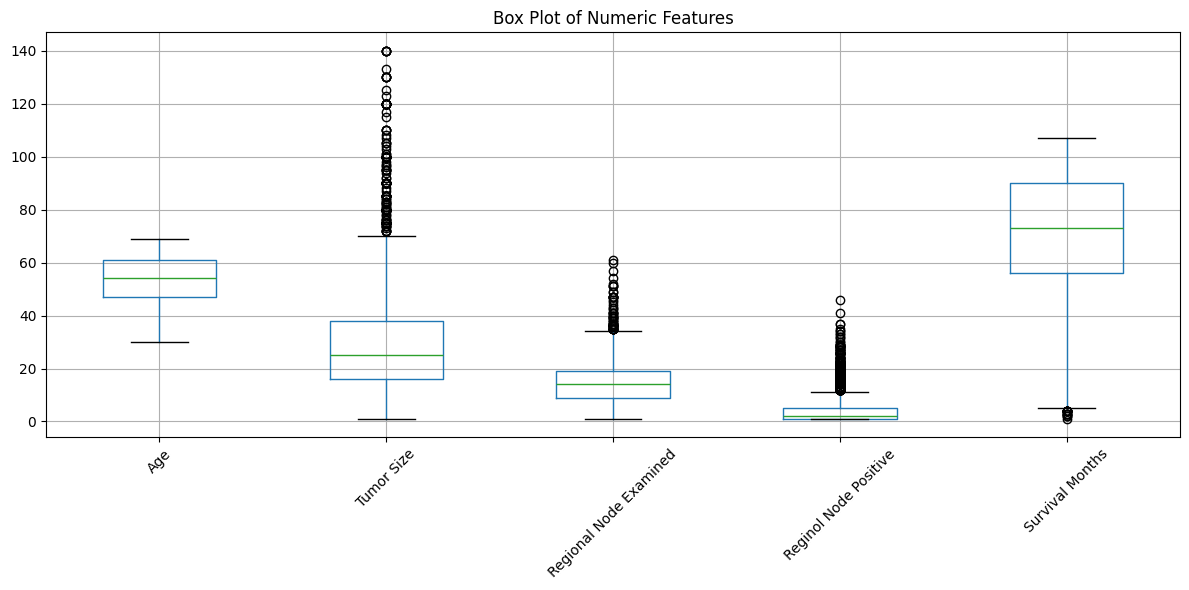

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Breast_Cancer_dataset.csv'
dataset = pd.read_csv(file_path)

# Identify numeric columns
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR for each numeric column
Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((dataset[numeric_cols] < (Q1 - 1.5 * IQR)) | (dataset[numeric_cols] > (Q3 + 1.5 * IQR)))

# Count outliers in each column
outlier_counts = outliers.sum()

print("Outlier counts for each numeric column:")
print(outlier_counts)

# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
dataset[numeric_cols].boxplot()
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Identify numeric columns
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:")
print(numeric_cols)
print("\nNumber of numeric columns:", len(numeric_cols))

# Display basic statistics of numeric columns
print("\nBasic statistics of numeric columns:")
print(dataset[numeric_cols].describe())

# Check for missing values in numeric columns
print("\nMissing values in numeric columns:")
print(dataset[numeric_cols].isnull().sum())

Numeric columns:
Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months'],
      dtype='object')

Number of numeric columns: 5

Basic statistics of numeric columns:
               Age   Tumor Size  Regional Node Examined  \
count  3823.000000  3622.000000             3421.000000   
mean     53.931467    30.560188               14.351652   
std       8.972253    21.428535                8.170800   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%            

In [6]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Handle missing values
# For numeric columns, fill with mean
for col in numeric_cols:
    dataset[col].fillna(dataset[col].mean(), inplace=True)

# For categorical columns, fill with mode
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Verify missing values have been handled
missing_values_after = dataset.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)


Missing values in each column:
Age                       201
Race                      402
Marital Status            321
T Stage                     0
N Stage                     0
6th Stage                   0
differentiate               0
Grade                       0
A Stage                     0
Tumor Size                402
Estrogen Status           201
Progesterone Status         0
Regional Node Examined    603
Reginol Node Positive       0
Survival Months             0
Status                      0
dtype: int64

Missing values after handling:
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                 

<ipython-input-6-e33c7ea3ebdd>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)
<ipython-input-6-e33c7ea3ebdd>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [7]:
scaler = StandardScaler()
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

# Verify standardization
print("\nDescriptive statistics after standardization:")
print(dataset[numeric_cols].describe())


Descriptive statistics after standardization:
                Age    Tumor Size  Regional Node Examined  \
count  4.024000e+03  4.024000e+03            4.024000e+03   
mean   1.809906e-16 -2.295491e-17            2.630986e-16   
std    1.000124e+00  1.000124e+00            1.000124e+00   
min   -2.736853e+00 -1.454218e+00           -1.772500e+00   
25%   -7.926972e-01 -6.670954e-01           -5.777041e-01   
50%    0.000000e+00 -2.735342e-01            2.358205e-16   
75%    8.083723e-01  2.184172e-01            4.843370e-01   
max    1.723269e+00  5.383907e+00            6.192808e+00   

       Reginol Node Positive  Survival Months  
count           4.024000e+03     4.024000e+03  
mean            8.961243e-17     3.023868e-16  
std             1.000124e+00     1.000124e+00  
min            -6.181718e-01    -3.067291e+00  
25%            -6.181718e-01    -6.674917e-01  
50%            -4.224271e-01     7.426453e-02  
75%             1.648069e-01     8.160207e-01  
max             8.1

In [8]:
# Check the number of features
n_features = len(numeric_cols)

if n_features > 10:  # Arbitrary threshold, adjust as needed
    pca = PCA(n_components=0.95)  # Retain 95% of variance
    pca_result = pca.fit_transform(dataset[numeric_cols])

    # Replace original features with PCA components
    pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
    dataset = pd.concat([dataset.drop(columns=numeric_cols), pca_df], axis=1)

    print(f"\nReduced dimensions from {n_features} to {pca_result.shape[1]}")
    print("Variance explained ratio:")
    print(pca.explained_variance_ratio_)
else:
    print("\nDimensionality reduction not necessary (less than 10 numeric features)")


Dimensionality reduction not necessary (less than 10 numeric features)


In [9]:
# Save the preprocessed dataset
preprocessed_file_path = 'preprocessed_breast_cancer_dataset.csv'
dataset.to_csv(preprocessed_file_path, index=False)
print(f"\nPreprocessed data saved to {preprocessed_file_path}")


Preprocessed data saved to preprocessed_breast_cancer_dataset.csv


# **Step 2: Modeling**

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Load the preprocessed dataset
data = pd.read_csv('preprocessed_breast_cancer_dataset.csv')

# Separate features and target
X = data.drop('Status', axis=1)
y = data['Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names after preprocessing, but map categorical back to original column names
# For categorical columns, use only the original column name without specific levels
encoded_feature_names = preprocessor.transformers_[0][2].tolist() + [
    f"{col}" for col in categorical_features for _ in range(len(
        preprocessor.named_transformers_['cat'].named_steps['onehot'].categories_[categorical_features.get_loc(col)]))
]

# Feature selection function
def select_features(X_train, y_train, X_test, method, k=10):
    if method == 'mutual_info':
        selector = SelectKBest(mutual_info_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)
    elif method == 'chi2':
        # Use non-negative data for chi-square
        selector = SelectKBest(chi2, k=k)
        X_train_selected = selector.fit_transform(np.abs(X_train), y_train)
        X_test_selected = selector.transform(np.abs(X_test))
    elif method == 'f_classif':
        selector = SelectKBest(f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)

    selected_feature_indices = selector.get_support(indices=True)
    selected_features = [encoded_feature_names[i] for i in selected_feature_indices]

    return X_train_selected, X_test_selected, selected_features

# Apply feature selection methods
methods = ['mutual_info', 'chi2', 'f_classif']
selected_features = {}

for method in methods:
    X_train_selected, X_test_selected, features = select_features(X_train_preprocessed, y_train, X_test_preprocessed, method)
    selected_features[method] = features
    print(f"Top 10 features selected by {method}:", features)

# SVM Ranker
svm = SVC(kernel='linear')
svm.fit(X_train_preprocessed, y_train)
svm_ranks = np.argsort(np.abs(svm.coef_[0]))[::-1]
svm_features = [encoded_feature_names[i] for i in svm_ranks[:10]]
print("Top 10 features by SVM Ranker:", svm_features)

# Now you can proceed with your modeling using the selected features


Top 10 features selected by mutual_info: ['Tumor Size', 'Reginol Node Positive', 'Survival Months', 'T Stage ', 'T Stage ', 'N Stage', 'N Stage', 'differentiate', 'Estrogen Status', 'Progesterone Status']
Top 10 features selected by chi2: ['Reginol Node Positive', 'Survival Months', 'N Stage', 'N Stage', '6th Stage', '6th Stage', 'differentiate', 'Grade', 'Estrogen Status', 'Progesterone Status']
Top 10 features selected by f_classif: ['Reginol Node Positive', 'Survival Months', 'N Stage', 'N Stage', '6th Stage', '6th Stage', 'Estrogen Status', 'Estrogen Status', 'Progesterone Status', 'Progesterone Status']
Top 10 features by SVM Ranker: ['Survival Months', 'T Stage ', 'Marital Status', 'T Stage ', 'Race', '6th Stage', 'Race', '6th Stage', 'Marital Status', 'Reginol Node Positive']


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed dataset
data = pd.read_csv('preprocessed_breast_cancer_dataset.csv')

# Separate features and target
X = data.drop('Status', axis=1)
y = data['Status']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names after preprocessing
encoded_feature_names = (
    numeric_features.tolist() +
    [f"{col}_{val}" for col, vals in zip(categorical_features,
                                         preprocessor.named_transformers_['cat'].named_steps['onehot'].categories_)
     for val in vals]
)

# Feature selection function
def select_features(X_train, y_train, X_test, method, k=10):
    if method == 'mutual_info':
        selector = SelectKBest(mutual_info_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)
    elif method == 'chi2':
        # Use non-negative data for chi-square
        selector = SelectKBest(chi2, k=k)
        X_train_abs = np.abs(X_train)
        X_test_abs = np.abs(X_test)
        X_train_selected = selector.fit_transform(X_train_abs, y_train)
        X_test_selected = selector.transform(X_test_abs)
    elif method == 'f_classif':
        selector = SelectKBest(f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)

    selected_feature_indices = selector.get_support(indices=True)
    selected_features = [encoded_feature_names[i] for i in selected_feature_indices]

    return X_train_selected, X_test_selected, selected_features

# Apply feature selection methods
methods = ['mutual_info', 'chi2', 'f_classif']
selected_features = {}

for method in methods:
    X_train_selected, X_test_selected, features = select_features(X_train_preprocessed, y_train, X_test_preprocessed, method)
    selected_features[method] = features
    print(f"Top 10 features selected by {method}:", features)

# SVM Ranker
svm = SVC(kernel='linear')
svm.fit(X_train_preprocessed, y_train)
svm_ranks = np.argsort(np.abs(svm.coef_[0]))[::-1]
svm_features = [encoded_feature_names[i] for i in svm_ranks[:10]]
print("Top 10 features by SVM Ranker:", svm_features)

# Use mutual_info selected features for further processing
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features['mutual_info'])
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features['mutual_info'])

# Define a KNN class
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.to_numpy()
        self.y_train = y.to_numpy()

    def predict(self, X):
        X = X.to_numpy()
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return max(set(k_nearest_labels), key=k_nearest_labels.count)

# Instantiate models
nb = GaussianNB()
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Define a function to evaluate each model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    return accuracy, report

# List of models to evaluate
models = [
    ("KNN", KNN(k=5)),
    ("Naive Bayes", nb),
    ("Decision Tree", dt),
    ("Random Forest", rf),
    ("Gradient Boosting", gb),
    ("Neural Network", nn)
]

# Evaluate models
for name, model in models:
    accuracy, report = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")

Top 10 features selected by mutual_info: ['Reginol Node Positive', 'Survival Months', 'T Stage _T4', 'N Stage_N1', 'N Stage_N3', '6th Stage_IIIC', 'differentiate_Poorly differentiated', 'Grade_3', 'Estrogen Status_Negative', 'Progesterone Status_Positive']
Top 10 features selected by chi2: ['Reginol Node Positive', 'Survival Months', 'N Stage_N1', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIIC', 'differentiate_Poorly differentiated', 'Grade_3', 'Estrogen Status_Negative', 'Progesterone Status_Negative']
Top 10 features selected by f_classif: ['Reginol Node Positive', 'Survival Months', 'N Stage_N1', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIIC', 'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']
Top 10 features by SVM Ranker: ['Survival Months', 'T Stage _T4', 'Marital Status_Separated', 'T Stage _T1', 'Race_Other', '6th Stage_IIIB', 'Race_Black', '6th Stage_IIA', 'Marital Status_Widowed', 'Reginol Node Positive']



# **Step 3: Hyperparameter Tuning**

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, make_scorer

# Define a custom scoring function
def custom_scorer(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return report['weighted avg']['f1-score']

# Create a custom scorer
custom_f1_scorer = make_scorer(custom_scorer)

# Function to perform grid search and display results
def perform_grid_search(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=custom_f1_scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Test set accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    return best_model, grid_search.best_score_  # Return both model and best score

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Random Forest Hyperparameter Tuning:")
best_rf, best_rf_score = perform_grid_search(RandomForestClassifier(random_state=42),
                                              rf_param_grid,
                                              X_train_selected, y_train,
                                              X_test_selected, y_test)

# Gradient Boosting hyperparameter tuning
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

print("\nGradient Boosting Hyperparameter Tuning:")
best_gb, best_gb_score = perform_grid_search(GradientBoostingClassifier(random_state=42),
                                              gb_param_grid,
                                              X_train_selected, y_train,
                                              X_test_selected, y_test)

# Compare the best models
print("\nComparison of Best Models:")
print("Random Forest - Best Cross-validation Score:", best_rf_score)
print("Gradient Boosting - Best Cross-validation Score:", best_gb_score)

# Conclude which set of hyperparameters worked the best
if best_rf_score > best_gb_score:
    print("\nRandom Forest performed better with the following hyperparameters:")
    print(best_rf.get_params())
else:
    print("\nGradient Boosting performed better with the following hyperparameters:")
    print(best_gb.get_params())


Random Forest Hyperparameter Tuning:
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.8912
Test set accuracy: 0.9118
Classification Report:
              precision    recall  f1-score   support

       Alive       0.92      0.98      0.95       685
        Dead       0.82      0.53      0.64       120

    accuracy                           0.91       805
   macro avg       0.87      0.75      0.79       805
weighted avg       0.91      0.91      0.90       805


Gradient Boosting Hyperparameter Tuning:
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.8939
Test set accuracy: 0.9106
Classification Report:
              precision    recall  f1-score   support

       Alive       0.92      0.98      0.95       685
        Dead       0.84      0.49      0.62       120

    accuracy                           0.91       80

# **Step 4: Results**

In [13]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Assuming best_rf and best_gb are your best models from the hyperparameter tuning
# and best_rf_score and best_gb_score are the corresponding best cross-validation scores.

# Create a results table
results = {
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Best CV Score': [best_rf_score, best_gb_score],
    'Test Accuracy': [accuracy_score(y_test, best_rf.predict(X_test_selected)),
                      accuracy_score(y_test, best_gb.predict(X_test_selected))]
}

results_df = pd.DataFrame(results)
print("Results Table:")
print(results_df.to_string(index=False))

# Determine feature importance for Random Forest
rf_importance = permutation_importance(best_rf, X_test_selected, y_test, n_repeats=10, random_state=42)
rf_feature_importance = pd.DataFrame({'feature': X_test_selected.columns,
                                      'importance': rf_importance.importances_mean})
rf_feature_importance = rf_feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Important Features for Random Forest:")
print(rf_feature_importance.head(10).to_string(index=False))

# Determine feature importance for Gradient Boosting
gb_importance = permutation_importance(best_gb, X_test_selected, y_test, n_repeats=10, random_state=42)
gb_feature_importance = pd.DataFrame({'feature': X_test_selected.columns,
                                      'importance': gb_importance.importances_mean})
gb_feature_importance = gb_feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Important Features for Gradient Boosting:")
print(gb_feature_importance.head(10).to_string(index=False))

# Conclusion
print("\nConclusion:")
if best_rf_score > best_gb_score:
    print("The Random Forest model performed better in predicting breast cancer survivability.")
else:
    print("The Gradient Boosting model performed better in predicting breast cancer survivability.")

print("\nWe were able to answer our initial question of predicting breast cancer survivability using machine learning models.")
print("The most important features for prediction, as identified by both models, include:")

# Identify common important features from both models
common_features = set(rf_feature_importance['feature'].head(5)) & set(gb_feature_importance['feature'].head(5))
for feature in common_features:
    print(f"- {feature}")

print("\nThese features appear to be crucial in determining breast cancer survivability and could be focus areas for further medical research and patient care.")


Results Table:
            Model  Best CV Score  Test Accuracy
    Random Forest       0.891249       0.911801
Gradient Boosting       0.893904       0.910559

Top 10 Important Features for Random Forest:
                            feature  importance
                    Survival Months    0.106460
       Progesterone Status_Positive    0.001863
           Estrogen Status_Negative    0.001118
differentiate_Poorly differentiated    0.000124
                            Grade_3    0.000124
                     6th Stage_IIIC    0.000000
                         N Stage_N1    0.000000
                        T Stage _T4   -0.000248
              Reginol Node Positive   -0.001366
                         N Stage_N3   -0.001739

Top 10 Important Features for Gradient Boosting:
                            feature  importance
                    Survival Months    0.105839
              Reginol Node Positive    0.002609
                        T Stage _T4    0.001988
           Estrogen Statu